In [1]:
import pandas as pd
from opensoundscape.ml.cnn import load_model
import sklearn

In [4]:
#load model from save path
model = load_model('/mnt/class_data/group1_bioacoustics/sheila/model_checkpoints/model_6_resample_learningrate/best.model')

/home/Sheila/miniconda3/envs/rewilding_cv4e/lib/python3.10/site-packages/opensoundscape/ml/cnn.py:2515: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_content = torch.

In [5]:
train_labels = pd.read_csv('data/train_labels.csv',index_col=['file', 'start_time', 'end_time'])
val_labels = pd.read_csv('data/val_labels.csv',index_col=['file', 'start_time', 'end_time'])
test_labels = pd.read_csv('data/test_labels.csv',index_col=['file', 'start_time', 'end_time'])
train_labels.head()


Hypsipetes_madagascariensis  \
file                                               start_time end_time                                
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                             False   
                                                   2.0        4.0                             False   
                                                   4.0        6.0                             False   
                                                   6.0        8.0                             False   
                                                   8.0        10.0                            False   

                                                                        Copsychus_albospecularis  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                          False   
                                                   2.0        4.0                          False   
                                                   4.0        6.0                          False   
                                                   6.0        8.0                          False   
                                                   8.0        10.0                         False   

                                                                        Coracopsis_nigra  \
file                                               start_time end_time                     
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                  False   
                                                   2.0        4.0                  False   
                                                   4.0        6.0                  False   
                                                   6.0        8.0                  False   
                                                   8.0        10.0                 False   

                                                                        Dicrurus_forficatus  \
file                                               start_time end_time                        
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                     False   
                                                   2.0        4.0                     False   
                                                   4.0        6.0                     False   
                                                   6.0        8.0                     False   
                                                   8.0        10.0                    False   

                                                                        Coua_caerulea  \
file                                               start_time end_time                  
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0               False   
                                                   2.0        4.0               False   
                                                   4.0        6.0               False   
                                                   6.0        8.0               False   
                                                   8.0        10.0              False   

                                                                        Zosterops_maderaspatanus  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                          False   
                                                   2.0        4.0                          False   
                                                   4.0        6.0                          False   
                                                   6.0        8.0                          False   
                                                   8.0        10.0                         False   

             

In [70]:
'''val_predictions = model.predict(val_labels,batch_size=64)'''
val_predictions.head()
#look at number empty clips in training data
#softmax puts on a scale from 0 to 1 mostly at the end of training
val_predictions = model.predict(val_labels,batch_size=64, activation_layer = 'softmax')
#ReLU a common activation layer inserted within a model - possibly outdated but GeLU more popular (differentiable at every point)

  0%|          | 0/58 [00:00<?, ?it/s]

In [71]:
sklearn.metrics.average_precision_score(val_labels,val_predictions)


/home/Sheila/miniconda3/envs/rewild_cv4e/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewild_cv4e/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewild_cv4e/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


0.31681479075044533

In [6]:
# pick classes to train the model on. These should occur in the annotated data
class_list = ['Hypsipetes_madagascariensis','Copsychus_albospecularis','Coracopsis_nigra','Dicrurus_forficatus','Coua_caerulea','Zosterops_maderaspatanus','Eurystomus_glaucurus','Agapornis_canus','Saxicola_torquatus','Cyanolanius_madagascarinus','Leptopterus_chabert','Nesoenas_picturatus','Coua_reynaudii','Ceblepyris_cinereus','Neodrepanis_coruscans','Philepitta_castanea','Eulemur_sp','Coua_cristata','Treron_australis']

class_list==train_labels.columns.values


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [73]:
avprecscore_by_sp = pd.DataFrame(columns=['species', 'avg_precision_score'])
for species in class_list:
    avgscore = sklearn.metrics.average_precision_score(val_labels [species],val_predictions [species])
    new_row = pd.DataFrame({'species': [species], 'avg_precision_score': [avgscore]})
    avprecscore_by_sp = pd.concat([avprecscore_by_sp, new_row], ignore_index=True)

avprecscore_by_sp

/tmp/ipykernel_208362/3979778992.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  avprecscore_by_sp = pd.concat([avprecscore_by_sp, new_row], ignore_index=True)
/home/Sheila/miniconda3/envs/rewild_cv4e/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewild_cv4e/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewild_cv4e/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set 

,species,avg_precision_score
0,Hypsipetes_madagascariensis,0.779816
1,Copsychus_albospecularis,0.740498
2,Coracopsis_nigra,0.629110
3,Dicrurus_forficatus,0.665716
4,Coua_caerulea,0.421067
5,Zosterops_maderaspatanus,0.360595
6,Eurystomus_glaucurus,0.869267
7,Agapornis_canus,0.020763
8,Saxicola_torquatus,0.264188
9,Cyanolanius_madagascarinus,0.462312


In [8]:
samples = val_labels[val_labels['Coua_caerulea']]

In [65]:
samples.to_csv('samples.csv')

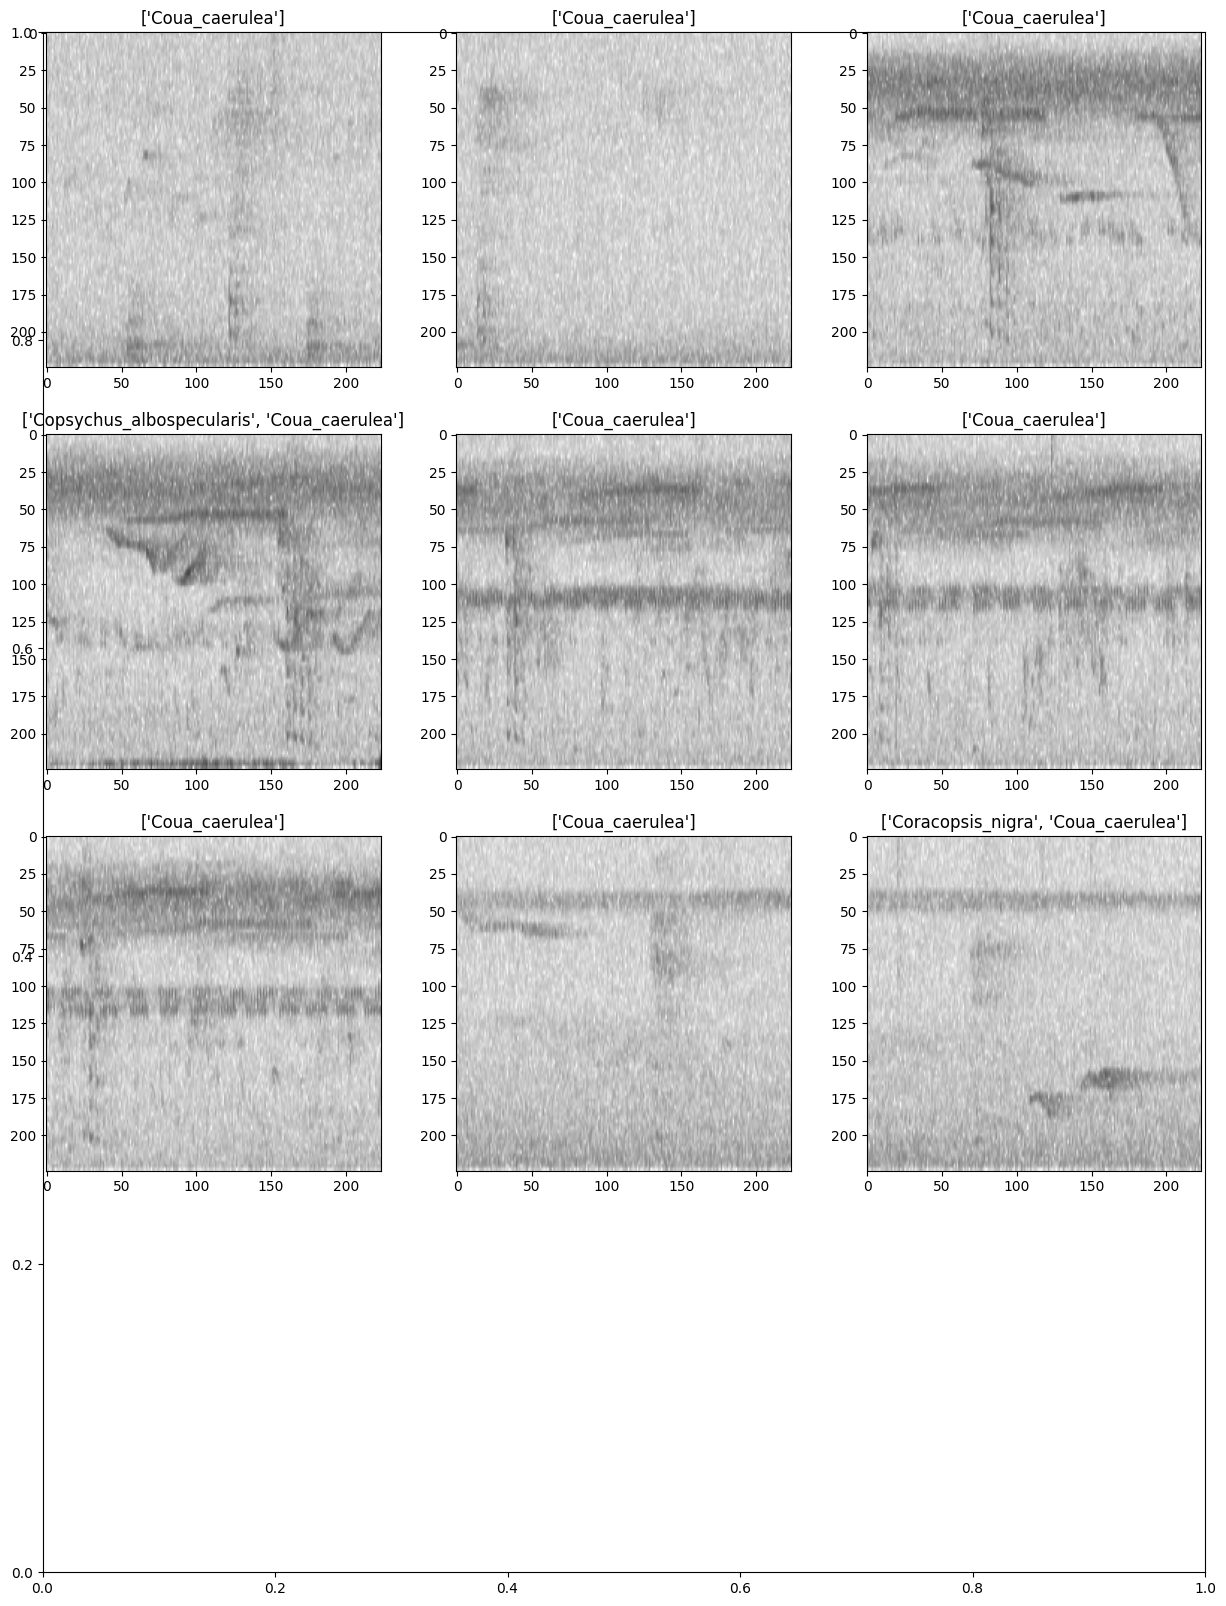

In [23]:
from opensoundscape.preprocess.utils import show_tensor_grid
from opensoundscape import AudioFileDataset
'''pre = SpectrogramPreprocessor(sample_duration=2.0)'''
dataset = AudioFileDataset(samples,model.preprocessor)
dataset.bypass_augmentations = True


tensors = [dataset[i].data for i in range(9)]
sample_labels = [list(dataset[i].labels[dataset[i].labels>0].index) for i in range(9)]

_ = show_tensor_grid(tensors,3,labels=sample_labels)

In [122]:
model.preprocessor?

Type:        SpectrogramPreprocessor
String form:
Preprocessor with pipeline:
           load_audio           Action calling <bound method Audio.from_file o.. <...>  at 0x761...
           random_affine        Augmentation Action calling <function torch_ra...
           dtype: object
File:        ~/miniconda3/envs/rewild_cv4e/lib/python3.11/site-packages/opensoundscape/preprocess/preprocessors.py
Docstring:  
Child of BasePreprocessor that creates specrogram Tensors w/augmentation

loads audio, creates spectrogram, performs augmentations, creates tensor

by default, does not resample audio, but bandpasses to 0-11.025 kHz
(to ensure all outputs have same scale in y-axis)
can change with .pipeline.bandpass.set(min_f=,max_f=)

Args:
    sample_duration:
        length in seconds of audio samples generated
        If not None, longer clips are trimmed to this length. By default,
        shorter clips will be extended (modify random_trim_audio and
        trim_audio to change behavior).

  

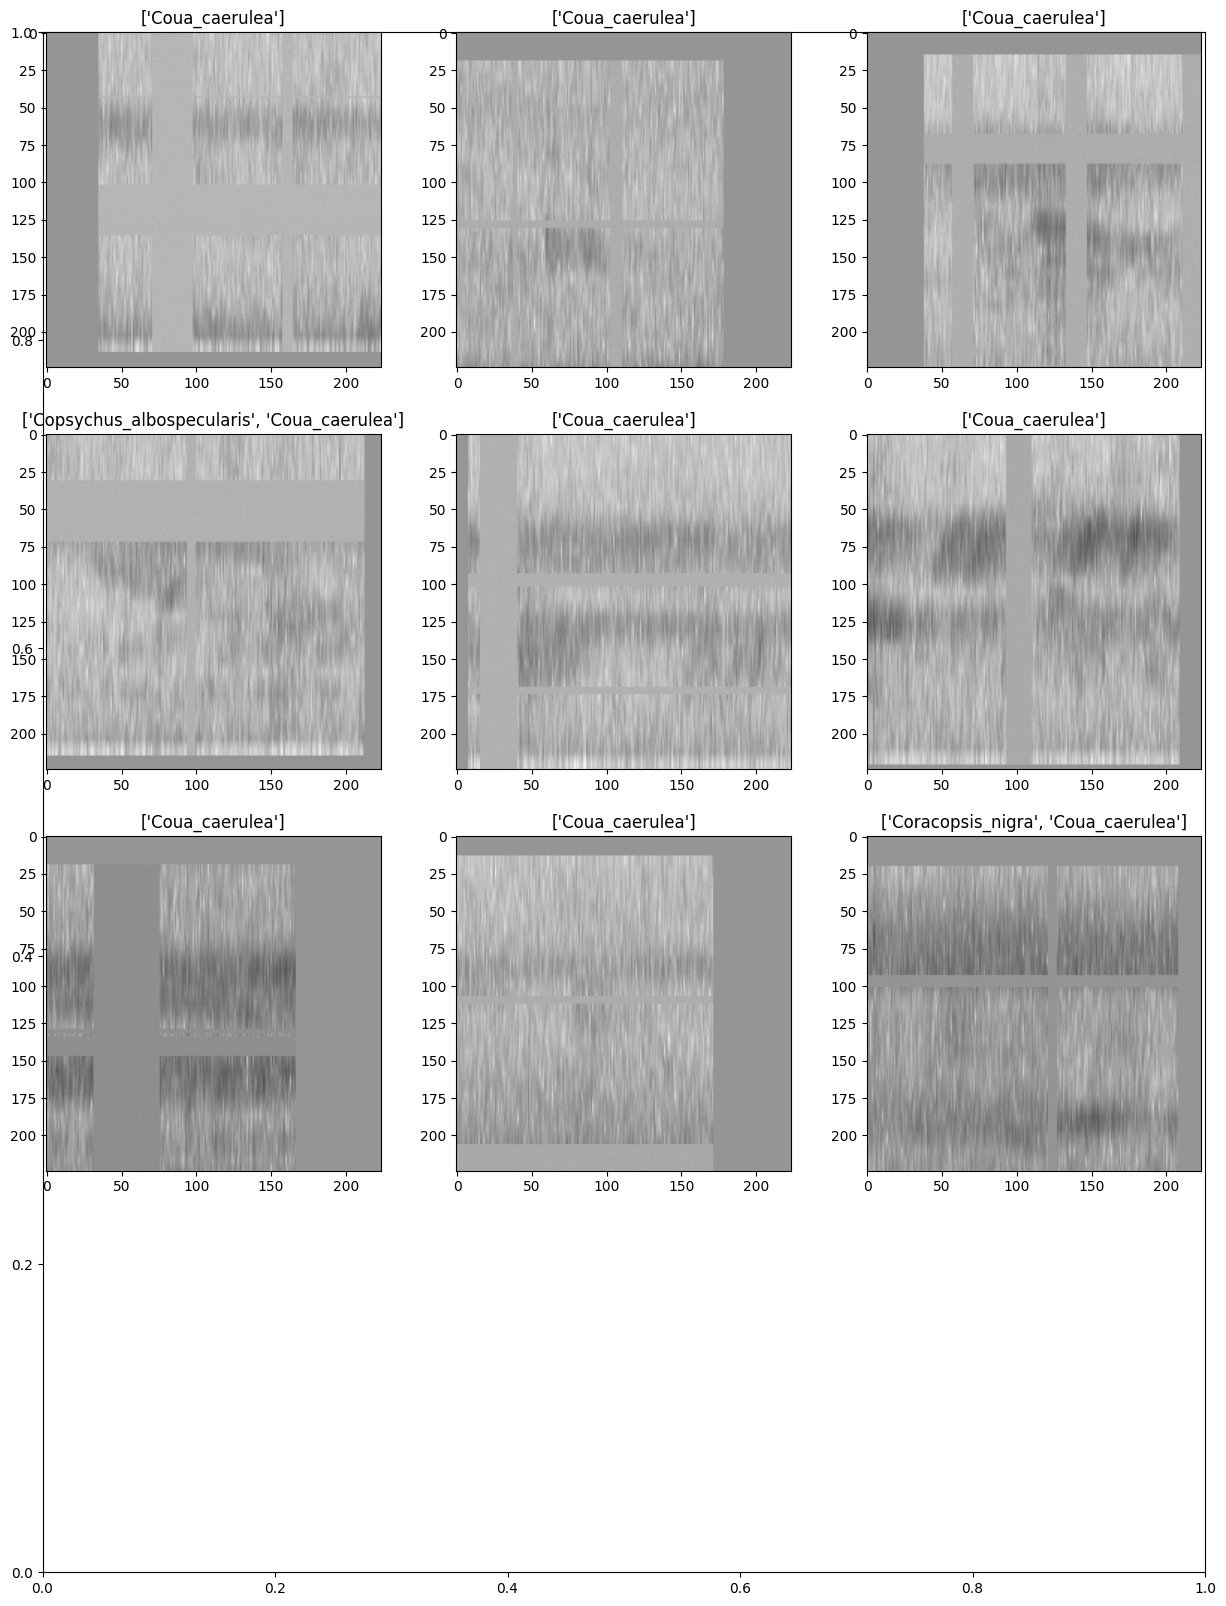

In [9]:
from opensoundscape.preprocess.utils import show_tensor_grid
from opensoundscape import AudioFileDataset
from opensoundscape import SpectrogramPreprocessor

'''pre = SpectrogramPreprocessor(sample_duration=2.0)'''
my_preprocessor = SpectrogramPreprocessor(sample_duration = 2, overlay_df=train_labels)
model.preprocessor = my_preprocessor
dataset = AudioFileDataset(samples,model.preprocessor)
# dataset.bypass_augmentations = True


tensors = [dataset[i].data for i in range(9)]
sample_labels = [list(dataset[i].labels[dataset[i].labels>0].index) for i in range(9)]

_ = show_tensor_grid(tensors,3,labels=sample_labels)

In [2]:
nina_df = pd.read_csv('/mnt/class_data/group1_bioacoustics/nina/data/ba_val_clip_labels.csv', index_col=[0,1,2])

In [3]:
import random
random.choice(nina_df.index)

('/mnt/class_data/group1_bioacoustics/nina/labeled_wav_files/41-5T14_20220707_073000042.wav',
 0.0,
 5.0)

In [121]:
import os
os.path.exists('/mnt/class_data/group1_bioacoustics/sheila/cv4e_dataset/validation/Ankarabolava_Agnakatrika/GKF_A/GKF_A-GKF08/GKF_A-GKF08_20230911_104000.WAV')

True

In [26]:
val_labels.head()

Hypsipetes_madagascariensis  \
file                                               start_time end_time                                
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                             False   
                                                   2.0        4.0                             False   
                                                   4.0        6.0                             False   
                                                   6.0        8.0                             False   
                                                   8.0        10.0                            False   

                                                                        Copsychus_albospecularis  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                          False   
                                                   2.0        4.0                          False   
                                                   4.0        6.0                          False   
                                                   6.0        8.0                          False   
                                                   8.0        10.0                         False   

                                                                        Coracopsis_nigra  \
file                                               start_time end_time                     
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                  False   
                                                   2.0        4.0                  False   
                                                   4.0        6.0                  False   
                                                   6.0        8.0                  False   
                                                   8.0        10.0                 False   

                                                                        Dicrurus_forficatus  \
file                                               start_time end_time                        
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                     False   
                                                   2.0        4.0                     False   
                                                   4.0        6.0                     False   
                                                   6.0        8.0                     False   
                                                   8.0        10.0                    False   

                                                                        Coua_caerulea  \
file                                               start_time end_time                  
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0               False   
                                                   2.0        4.0               False   
                                                   4.0        6.0               False   
                                                   6.0        8.0               False   
                                                   8.0        10.0              False   

                                                                        Zosterops_maderaspatanus  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                          False   
                                                   2.0        4.0                          False   
                                                   4.0        6.0                          False   
                                                   6.0        8.0                          False   
                                                   8.0        10.0                         False   

             

In [27]:
#Look specifically at spectrograms for TRUE that were scored high and low and for FALSE that were scored high and low

In [10]:
histspecies = 'Hypsipetes_madagascariensis'
histspeciespred = histspecies + 'pred'
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
# read in the best model - done earlier
# extract raw scores from the model
# merge labels into scores
scores_valid_df = val_labels.join(val_predictions, rsuffix="pred")
# Filter
df_Pos = scores_valid_df[scores_valid_df[histspecies] == True] #or whatever your class of interest is called
df_NOT = scores_valid_df[scores_valid_df[histspecies] == False]
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
# Show the plot
plt.show()

/home/Sheila/miniconda3/envs/rewilding_cv4e/lib/python3.10/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


NameError: name 'val_predictions' is not defined

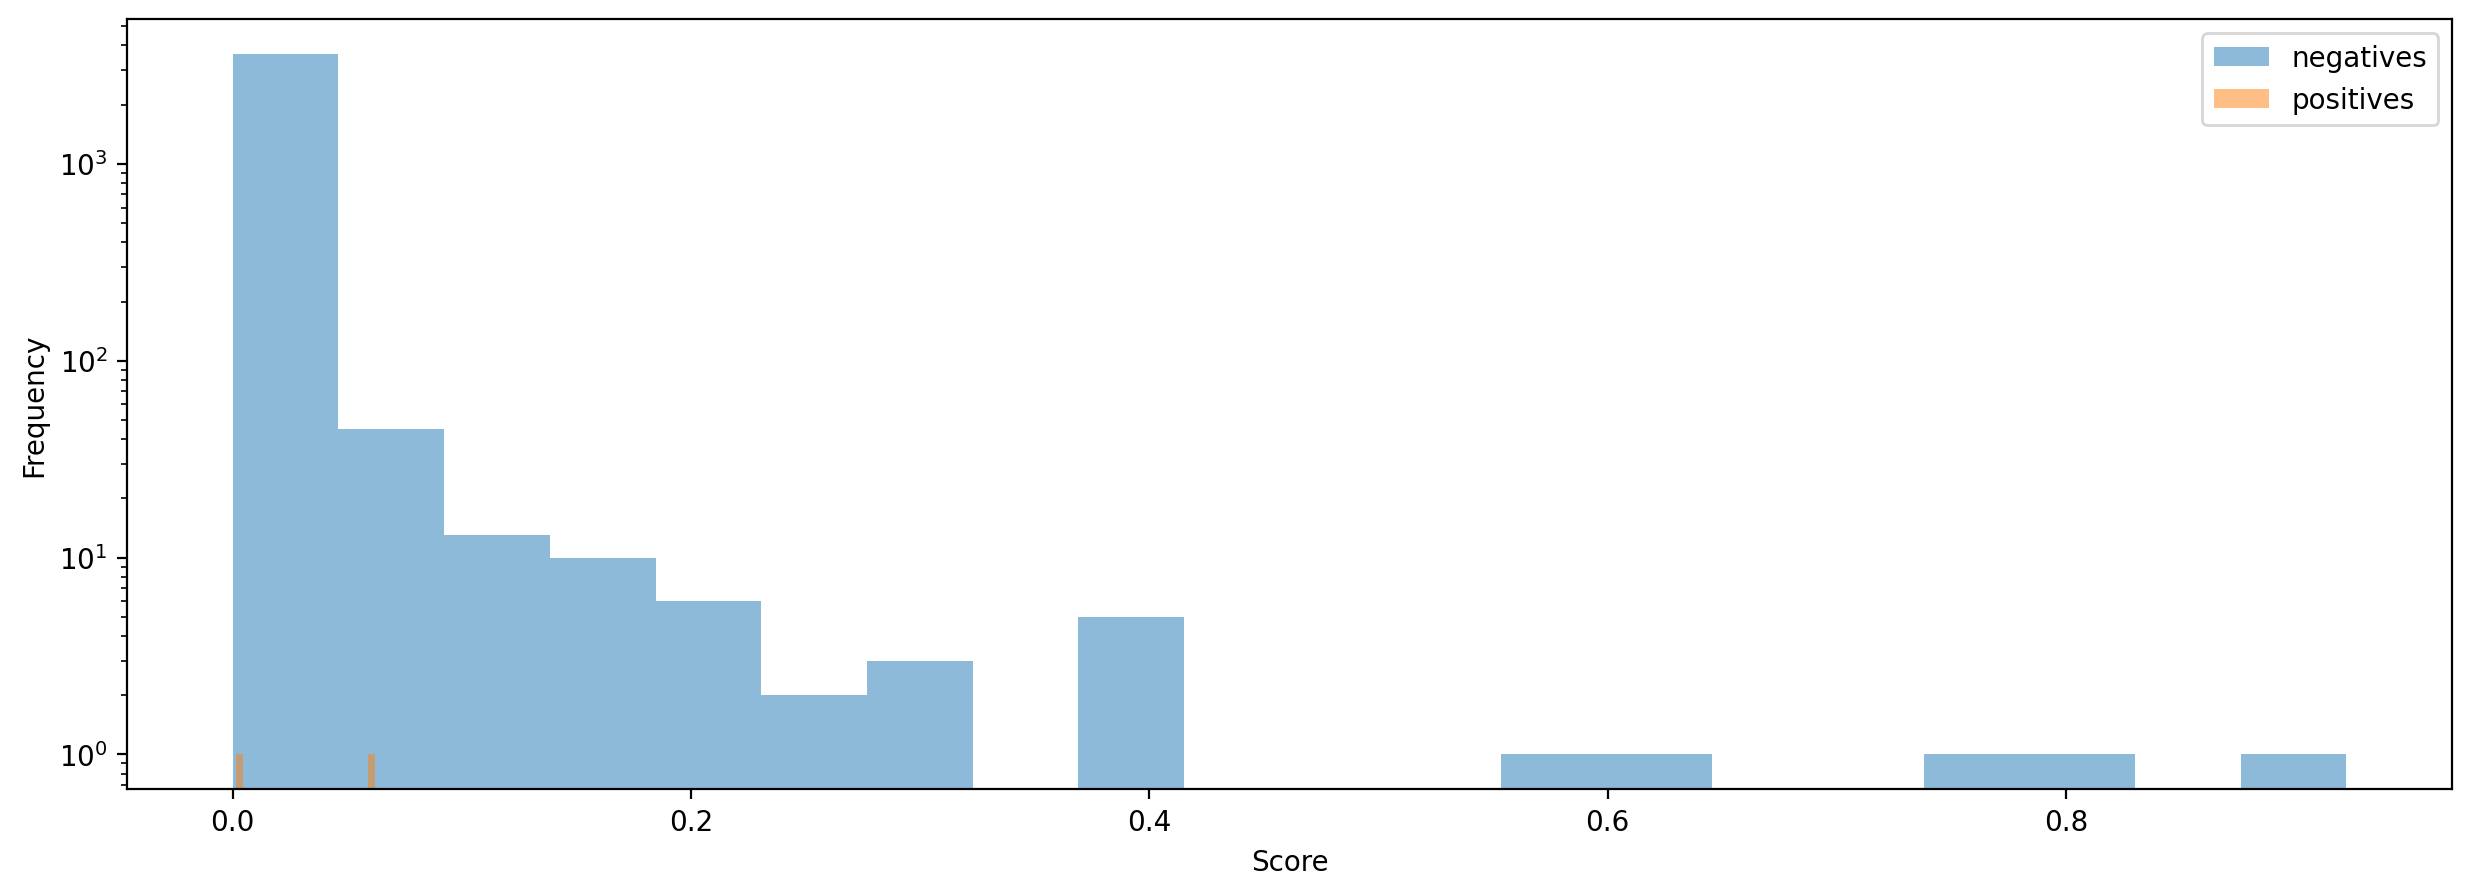

In [112]:
#Histogram with Y axis on log scale
# Plot histograms
plt.hist(df_NOT[histspeciespred],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspeciespred],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()